In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('netflix.mplstyle')

palette = {'primary': '#221f1f', 'secondary': '#b20710', 'accent': '#e50914', 'tertiary': '#f5f5f1'}

In [7]:
reviews = pd.read_csv('data/reviews_clean.csv')
reviews

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw5704482,raeldor-96879,After Life,9.0,Very Strong Season 2,3 May 2020,0,"I enjoyed the first season, but I must say I t...","['1', '1']"
1,rw5704483,dosleeb,The Valhalla Murders,6.0,Icelandic detectives?,3 May 2020,0,I know Iceland is a small country and police d...,"['2', '2']"
2,rw5704493,UniqueParticle,Unstoppable,8.0,Excellent last film of legendary Director Tony...,3 May 2020,0,A suspenseful thrilling adventure about a loos...,"['3', '4']"
3,rw5704496,Hellooo1234321,Dangerous Lies,NaN,Not bad,3 May 2020,0,Highlight was Camila Mendes exceptional acting...,"['2', '3']"
4,rw5704507,indieevan,The Master,8.0,"Great Potential, Less Great Execution",3 May 2020,0,"The premise was a 10, but the execution left a...","['1', '1']"
...,...,...,...,...,...,...,...,...,...
909450,rw0098919,compsecure,Point Blank,NaN,role made for the original 60s action man,23 April 2004,0,This was a movie made for Marvin. Whether by d...,"['33', '44']"
909451,rw0098920,kyle-garabadian,Point Blank,9.0,Point Blank is one of the most influential fil...,12 June 2004,0,Point Blank is one of those lost gems from the...,"['97', '119']"
909452,rw0098921,sol-kay,Point Blank,8.0,John Boorman's hypnotic & stylish 1967 crime t...,14 July 2004,0,"****SPOILERS***** Mal Reese, John Vernon, took...","['2', '4']"
909453,rw0098922,ginger_sonny,Point Blank,NaN,classic,31 August 2004,0,A violent crime classic. In British director J...,"['2', '4']"


In [3]:
movie_mean_scores = reviews.groupby(['movie'])['rating'].mean()
movie_total_reviews = reviews.groupby(['movie'])['rating'].count()

movie_scores = pd.concat({'mean': movie_mean_scores, 'n_reviews': movie_total_reviews}, axis=1)

movie_scores.loc[['Bee Movie', 'Person of Interest']]

,mean,n_reviews
movie,,
Bee Movie,6.064189,296
Person of Interest,8.743590,351


<AxesSubplot:xlabel='mean', ylabel='Density'>

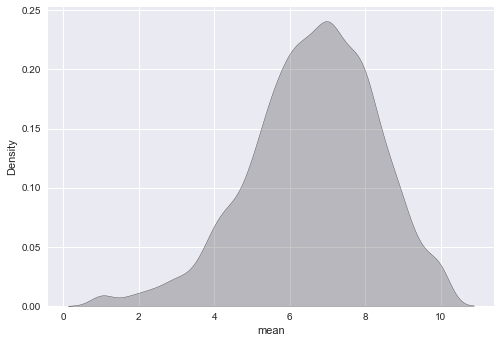

In [4]:
# movie_scores.plot(kind='hist', y='mean', bins=10)
sns.kdeplot(movie_scores['mean'], shade=True)

In [6]:
reviews[reviews['rating'].isnull()].count()

review_id         73319
reviewer          73319
movie             73319
rating                0
review_summary    73319
review_date       73319
spoiler_tag       73319
review_detail     73319
helpful           73319
dtype: int64